#**Challenge 5:**

Print the shape of [this video](https://youtu.be/joJJJQF70HM) (number of frames and size of frames) then change the number of frames and frame size to your year of birth.<br>
Also show the stft plot of its sound (nfft should be your year of birth).<br>
**Optional task for more grade**: Create an animation of frames with while, clear_output and imshow.
<br><br><br>
If you have any questions please contact me via [this link](http://smalek.22web.org/co/).
<br><br>
**Good luck my dear students**

My solution to this task:

In [ ]:
pip install pytube3

In [ ]:
import pytube
url='https://www.youtube.com/watch?v=joJJJQF70HM&feature=youtu.be'
youtube = pytube.YouTube(url)

In [ ]:
video = youtube.streams.first()
video.download()

'/content/Azerbaycan himni (Möhteşem) Azerbaijan national hymne (anthem).mp4'

In [ ]:
year_of_birth=2001

LETS GET THE ORIGINAL SIZE OF FRAME OF VIDEO

In [ ]:
import cv2
cap = cv2.VideoCapture("/content/Azerbaycan himni (Möhteşem) Azerbaijan national hymne (anthem).mp4")
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 800)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 600)
ret, frame = cap.read()
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
print('size:', width, height)


size: 640.0 360.0


LETS GET THE ORIGINAL NUMBER OF FRAMES

In [ ]:
import time
import cv2
cap = cv2.VideoCapture("/content/Azerbaycan himni (Möhteşem) Azerbaijan national hymne (anthem).mp4")
property_id = int(cv2.CAP_PROP_FRAME_COUNT)
length = int(cv2.VideoCapture.get(cap, property_id))
print( length )

3230


LETS BUILD THE LIST WITH OPTIMAL NUMBER OF FRAMES AND SIZE

In [ ]:
import cv2
from skimage.transform import resize
import numpy as np
from IPython.display import clear_output
vs=[]
vcap=cv2.VideoCapture('/content/Azerbaycan himni (Möhteşem) Azerbaijan national hymne (anthem).mp4')
success=True
iml=[]
c=0
while success:
  try:
    success,image=vcap.read()
    c+=1
    if c<2500:
      im=resize(image,(128,192))
      iml.append(im)
  except:
    pass
vs.append(iml)

In [ ]:
im.shape

(128, 192, 3)

In [ ]:
number_of_frames=len(iml)
number_of_frames

2499

In [ ]:
vs=np.array(vs)
vs.shape

(1, 2499, 128, 192, 3)

1 VIDEO X 2499 FRAMES X 128 HEIGHT X 192 WIDTH X 3 COLOR CHANNELS(RGB)

CHANGING THE SIZE OF FRAME TO THE (YEAR OF BIRTH,YEAR OF BIRTH)

In [ ]:
preprocessed_vs=[]
for k in range(len(vs)):
  frames=[]
  image=resize(vs[0][0],(year_of_birth,year_of_birth,3))
  frames.append(image)
preprocessed_vs.append(frames)

In [ ]:
preprocessed_vs=np.array(preprocessed_vs)

In [ ]:
preprocessed_vs.shape

(1, 1, 2001, 2001, 3)

CHANGING THE NUMBER OF FRAMES TO THE VALUE OF YEAR OF BIRTH

In [ ]:
preprocessed_vs=[]
for k in range(len(vs)):
  frames=[]
  for n in range(year_of_birth):
    image=resize(vs[0][0],(64,64,3))
    frames.append(image)
preprocessed_vs.append(frames)

In [ ]:
preprocessed_vs=np.array(preprocessed_vs)

In [ ]:
preprocessed_vs.shape

(1, 2001, 64, 64, 3)

In [ ]:
pip install moviepy

Extracting audio from video

In [ ]:
import moviepy.editor as mp
clip=mp.VideoFileClip(r'/content/Azerbaycan himni (Möhteşem) Azerbaijan national hymne (anthem).mp4')
clip.audio.write_audiofile(r'audio.wav')

[MoviePy] Writing audio in audio.wav


100%|██████████| 2974/2974 [00:01<00:00, 2265.70it/s]


[MoviePy] Done.


In [ ]:
pip install stft

SFFT plot of audio(NFFT value is set on the value of year of birth)

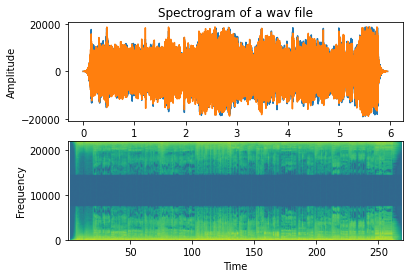

In [ ]:
import matplotlib.pyplot as plot

from scipy.io import wavfile


samplingFrequency, signalData = wavfile.read('audio.wav')

plot.subplot(211)

plot.title('Spectrogram of a wav file')



plot.plot(signalData)

plot.xlabel('Sample')

plot.ylabel('Amplitude')


plot.subplot(212)

plot.specgram(signalData.reshape(-1),Fs=samplingFrequency,NFFT=year_of_birth)

plot.xlabel('Time')

plot.ylabel('Frequency')



plot.show()

MAKING ANIMATION FROM IMAGES

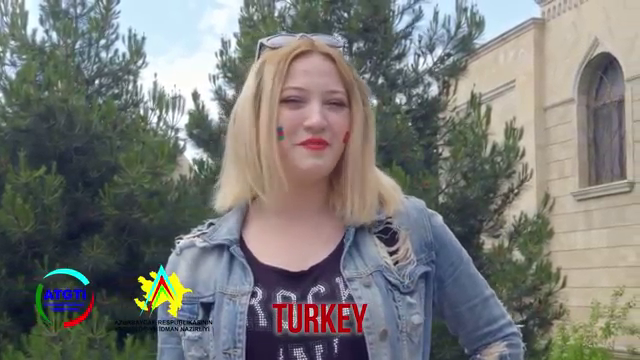

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
vidcap = cv2.VideoCapture('/content/Azerbaycan himni (Möhteşem) Azerbaijan national hymne (anthem).mp4')
set_gap_between_seconds=2   #HOW FASTER SHOULD BE THE ANIMATION
how_many_frames=20      #HOW MUCH FRAMES SHOULD BE SHOWED IN ANIMATION
x=0
from_which_time=10     #FROM WHICH PART OF VIDEO TO START(in seconds)
for n in range(how_many_frames):
  vidcap.set(cv2.CAP_PROP_POS_MSEC,(x+from_which_time)*1000)  #set at (x+from which time) second of video
  x+=set_gap_between_seconds
  success,image = vidcap.read()
  if success:
      time.sleep(0.8)
      clear_output()
      cv2_imshow(image)
      cv2.waitKey(0)


      #SOME FRAMES CAN BE MISSED SO IF YOU WANT TO GET X NUMBER OF FRAMES,SET THE NUMBER OF FRAMES A LITTLE HIGHER

In [ ]:
def get_animation_from_video(how_many_frames,set_gap_between_seconds,from_which_time,video_source):
  vidcap = cv2.VideoCapture(video_source)
  x=0
  for n in range(how_many_frames):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,(x+from_which_time)*1000)  #set at x-th second of video
    x+=set_gap_between_seconds
    success,image = vidcap.read()
    if success:
      time.sleep(0.8)
      clear_output()
      cv2_imshow(image)
      cv2.waitKey(0)

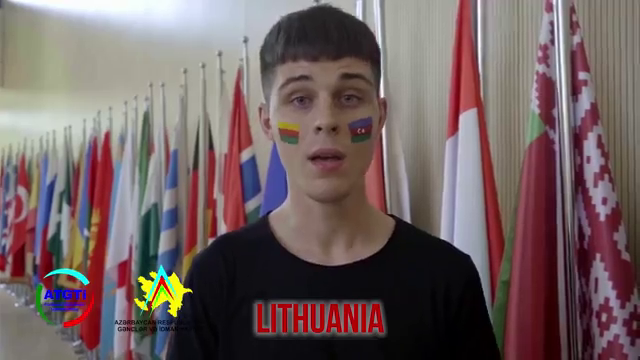

In [ ]:
get_animation_from_video(how_many_frames=50,set_gap_between_seconds=1,from_which_time=2,video_source='/content/Azerbaycan himni (Möhteşem) Azerbaijan national hymne (anthem).mp4')